In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv',header = None, index_col=0)

df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
 df = df[[2,3]].reset_index(drop=True)

In [ ]:
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
sum(df['text'].apply(len)>5) , sum(df['text'].apply(len)<=5)

(72883, 2113)

In [ ]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-05xg23va
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-05xg23va
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=e4dca8e175020d02a6072bb8d6eebd2c6c6683b4e4dd10d2b236e1e009908981
  Stored in directory: /tmp/pip-ephem-wheel-cache-uh8t40hi/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:

 import preprocess_kgptalkie as ps

In [ ]:
df = ps.get_basic_features(df)

In [ ]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

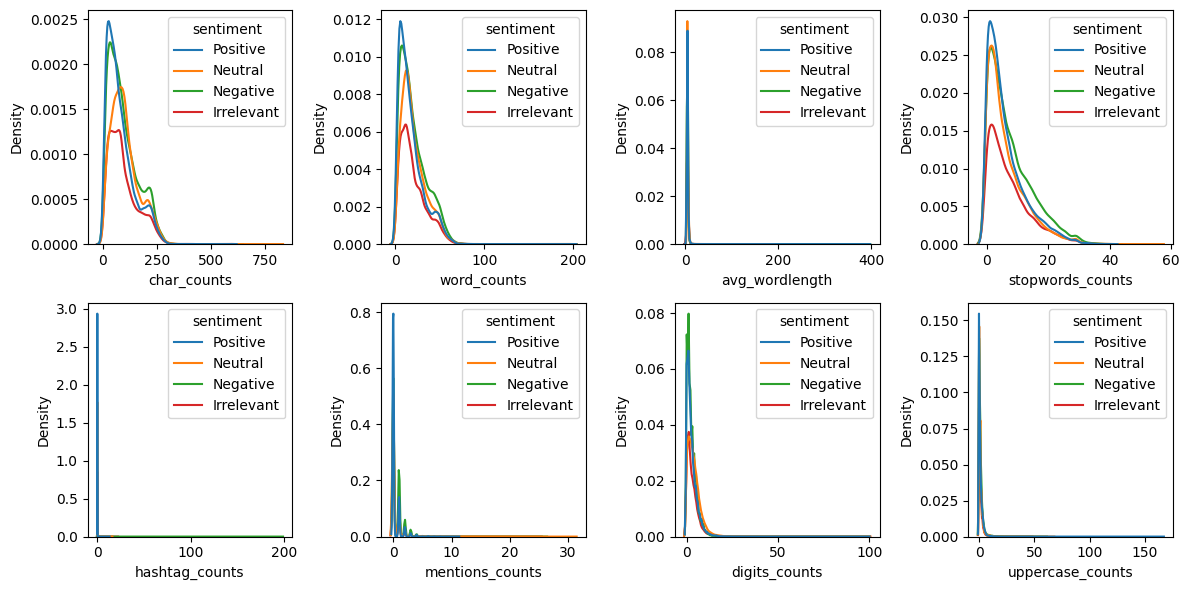

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
  plt.subplot(2,4, index+1)
  sns.kdeplot(data=df, x = col,hue="sentiment")

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

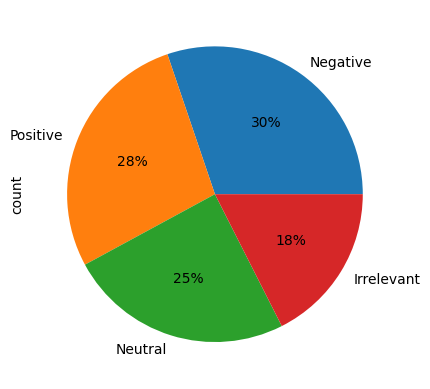

In [ ]:
 df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")

In [ ]:
#wordcloud visualization
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)

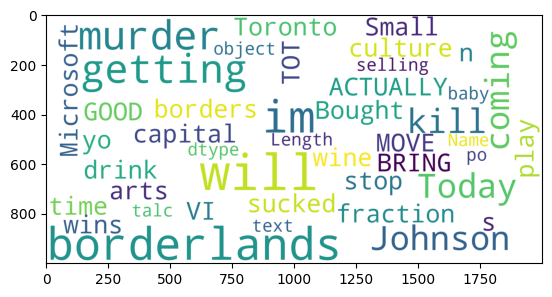

In [ ]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words = 300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

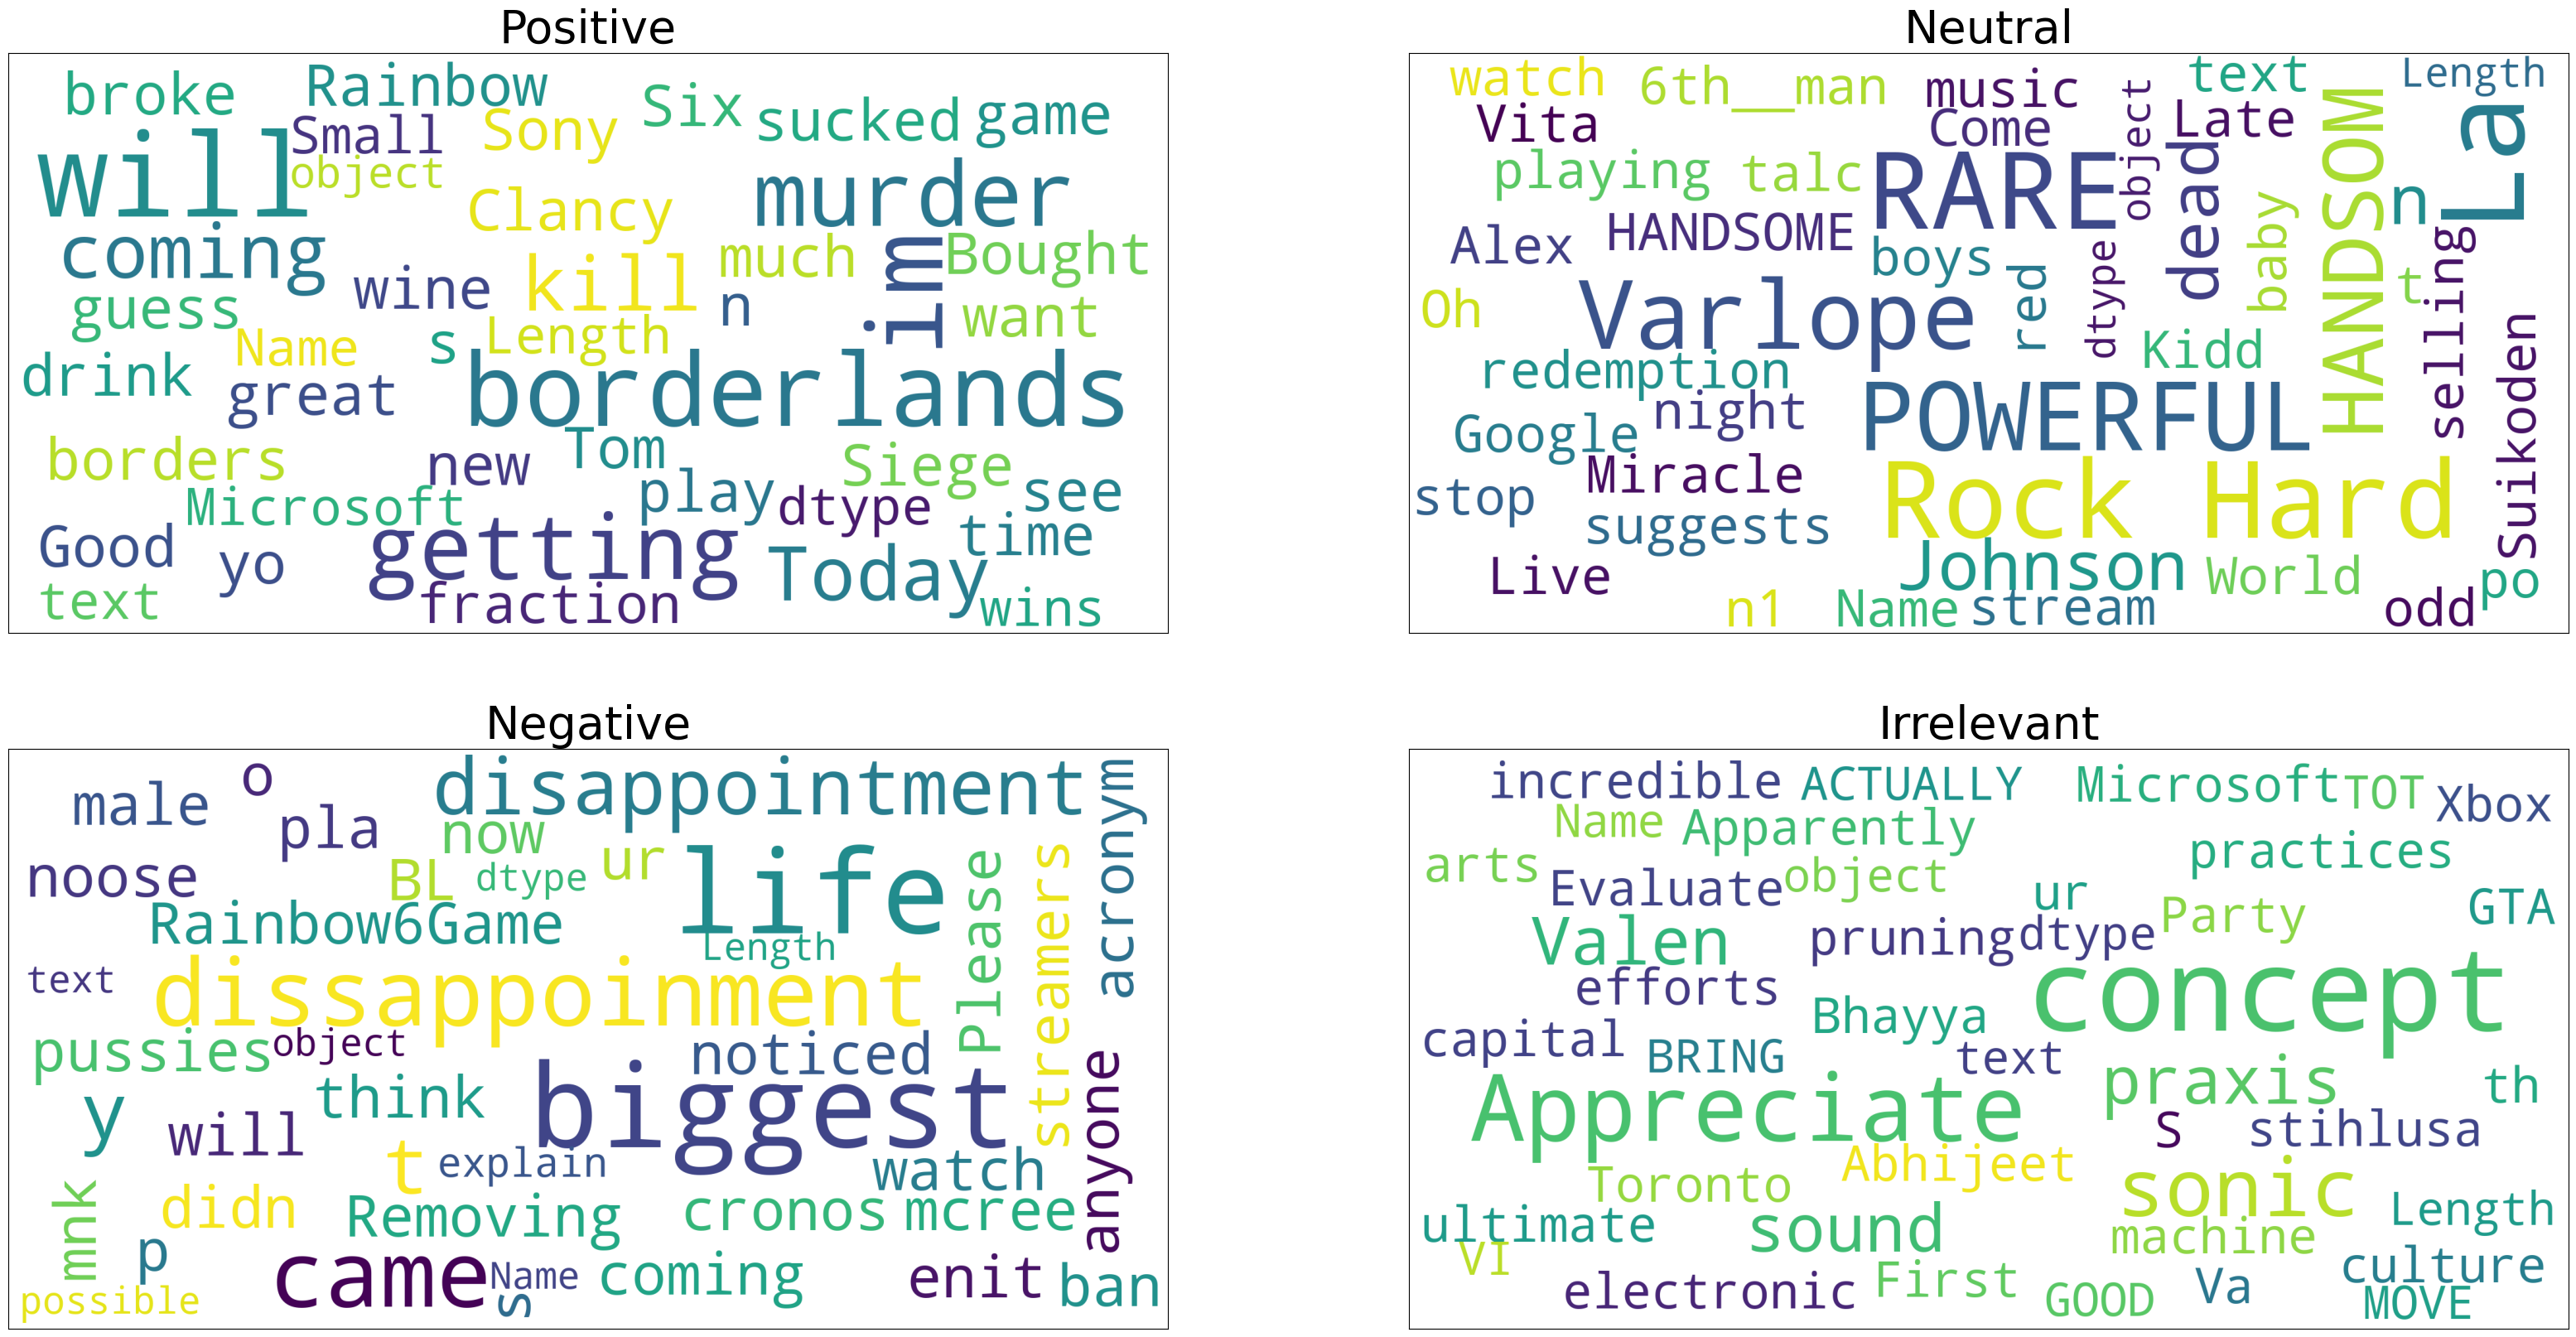

In [ ]:
plt.figure(figsize=(40,20))

for index,sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2,index+1)

  data = df[df['sentiment']==sent]['text']
  wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words = 300,max_font_size=40,scale=5).generate(str(data))

  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent,fontsize=40)

### Data Cleaning


In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ('tfid',TfidfVectorizer()),
    ('rfc',RandomForestClassifier(n_jobs=-1))
    ])

clf.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
import pickle
#pickle.dump(clf, open("twitter_sentiment.pkl",'wb'))
with open('model_pkl', 'wb') as files:
    pickle.dump(clf, files)

In [ ]:
clf.predict(['Let me not upset you but the fact'])